In [1]:
%matplotlib inline

# Initial Data Cleaning and Exploration

# Directory & Packages

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import pysentiment
from textstat.textstat import textstat 
from wordcloud import WordCloud
import nltk
from bs4 import BeautifulSoup

The default directory is the code subdirectory. Changing to the main repo directory above.

In [3]:
retval=os.chdir("..")

# Helper Functions

In [4]:
def pd_tab(df,col,sort_by='count',asc=False):
    tab=df[col].value_counts(dropna=False).reset_index(name='count')
    tab.columns=[col,'count']
    tab['percent']=tab['count']/tab['count'].sum()
    tab.sort_values(by=sort_by,inplace=True,ascending=asc)
    return tab

# Upload Data

In [5]:
# Launch the Jupyter notebook from one directory above the project directory
raw_data=pd.read_csv("./raw_data/Reviews.csv")
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Inspecting the Raw Features

In [6]:
raw_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
len(raw_data)

568454

**Data Key**  

* **product/productId:** asin, e.g. amazon.com/dp/B001E4KFG0  
* **review/userId:** id of the user, e.g. A3SGXH7AUHU8GW  
* **review/profileName:** name of the user  
* **review/helpfulness:** fraction of users who found the review helpful  
* **review/score:** rating of the product  
* **review/time:** time of the review (unix time)  
* **review/summary:** review summary  
* **review/text:** text of the review  

##### ID

In [8]:
raw_data.Id.is_unique

True

##### Product ID

In [9]:
len(raw_data.ProductId.unique())

74258

In [10]:
len(raw_data.ProductId.unique())/len(raw_data)

0.13063150228514533

In [11]:
pd_tab(raw_data,'ProductId').head(10)

,ProductId,count,percent
0,B007JFMH8M,913,0.001606
2,B002QWP89S,632,0.001112
3,B0026RQTGE,632,0.001112
4,B002QWHJOU,632,0.001112
1,B002QWP8H0,632,0.001112
5,B003B3OOPA,623,0.001096
6,B001EO5Q64,567,0.000997
12,B001RVFEP2,564,0.000992
15,B0026KPDG8,564,0.000992
14,B000VK8AVK,564,0.000992


In [12]:
pd_tab(raw_data,'ProductId').tail(10)

,ProductId,count,percent
53986,B001LFKTN6,1,0.000002
53985,B004AGBXQA,1,0.000002
53984,B003HAG612,1,0.000002
53983,B001HTLB24,1,0.000002
53982,B008RFRPEE,1,0.000002
53981,B0018LC8XM,1,0.000002
53980,B003Z6ZIZI,1,0.000002
53979,B000VM2RV2,1,0.000002
53978,B003D4GR1G,1,0.000002
74257,B007I6D0O2,1,0.000002


##### UserID

In [13]:
len(raw_data.UserId.unique())

256059

In [14]:
len(raw_data.UserId.unique())/len(raw_data)

0.450448057362601

In [15]:
pd_tab(raw_data,'UserId').head(10)

,UserId,count,percent
0,A3OXHLG6DIBRW8,448,0.000788
1,A1YUL9PCJR3JTY,421,0.000741
2,AY12DBB0U420B,389,0.000684
3,A281NPSIMI1C2R,365,0.000642
4,A1Z54EM24Y40LL,256,0.000450
5,A1TMAVN4CEM8U8,204,0.000359
6,A2MUGFV2TDQ47K,201,0.000354
7,A3TVZM3ZIXG8YW,199,0.000350
8,A3PJZ8TU8FDQ1K,178,0.000313
9,AQQLWCMRNDFGI,176,0.000310


In [16]:
pd_tab(raw_data,'UserId').tail(10)

,UserId,count,percent
139127,A20FWCIY7HIAQ,1,0.000002
139128,A2XWZFNBBRZYIQ,1,0.000002
139129,A76RHELZCLF44,1,0.000002
139130,A2OUXQCNHKPRTB,1,0.000002
139131,A3MSB7N678O962,1,0.000002
139132,A3LD8TF0S7543X,1,0.000002
139133,ARW9RLRGLH0TK,1,0.000002
139134,A1K2OG5UQSNVU6,1,0.000002
139135,A19XYNYKI0KS4F,1,0.000002
256058,A1CCZ00L3XLLM8,1,0.000002


##### Profile Name

ignoring

##### Helpfulness Numerator

In [17]:
raw_data.HelpfulnessNumerator.isnull().sum()

0

In [18]:
np.sum(raw_data.HelpfulnessNumerator==0)

303826

In [19]:
np.sum(raw_data.HelpfulnessNumerator==0)/len(raw_data)

0.53447772379119507

At least 53% are not helpful

In [20]:
raw_data.HelpfulnessNumerator.describe()

count    568454.000000
mean          1.743817
std           7.636513
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64

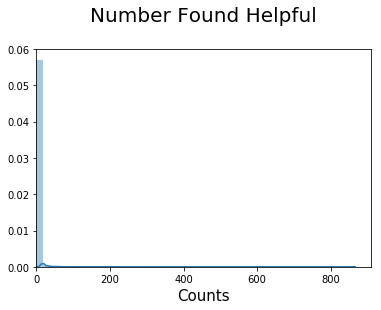

In [21]:
g=sns.distplot(raw_data.HelpfulnessNumerator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful\n',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

Very skewed

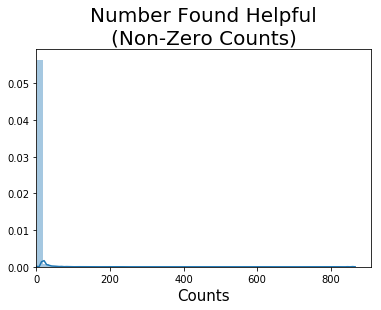

In [22]:
g=sns.distplot(raw_data[raw_data.HelpfulnessNumerator>0].HelpfulnessNumerator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful\n(Non-Zero Counts)',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

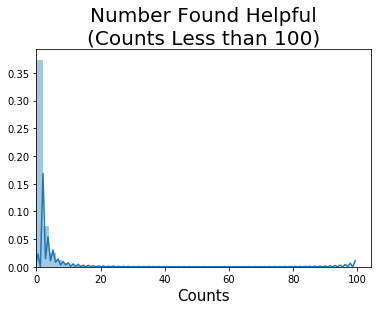

In [23]:
g=sns.distplot(raw_data[raw_data.HelpfulnessNumerator<100].HelpfulnessNumerator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful\n(Counts Less than 100)',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

##### Helpfulness Denominator

In [24]:
raw_data.HelpfulnessDenominator.isnull().sum()

0

In [25]:
np.sum(raw_data.HelpfulnessDenominator==0)

270052

In [26]:
np.sum(raw_data.HelpfulnessDenominator==0)/len(raw_data)

0.4750639453676111

In [27]:
raw_data.HelpfulnessDenominator.describe()

count    568454.00000
mean          2.22881
std           8.28974
min           0.00000
25%           0.00000
50%           1.00000
75%           2.00000
max         923.00000
Name: HelpfulnessDenominator, dtype: float64

In [28]:
raw_data[raw_data.HelpfulnessDenominator>100].HelpfulnessDenominator.describe()

count    423.000000
mean     204.886525
std      131.705928
min      101.000000
25%      120.000000
50%      152.000000
75%      235.000000
max      923.000000
Name: HelpfulnessDenominator, dtype: float64

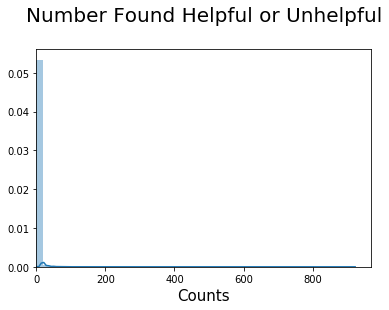

In [29]:
g=sns.distplot(raw_data.HelpfulnessDenominator)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful or Unhelpful\n',fontsize=20)
g.set_xlabel('Counts',fontsize=15)

##### Helpfulness Numerator/Denominator

In [30]:
len(raw_data[raw_data.HelpfulnessDenominator<raw_data.HelpfulnessNumerator])

2

In [31]:
raw_data[raw_data.HelpfulnessDenominator<raw_data.HelpfulnessNumerator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [32]:
raw_data=raw_data.loc[(raw_data.HelpfulnessDenominator<raw_data.HelpfulnessNumerator)==False]

In [33]:
raw_data['Unhelpful']=raw_data.HelpfulnessDenominator-raw_data.HelpfulnessNumerator

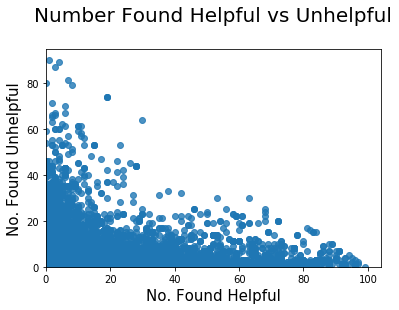

In [34]:
g=sns.regplot(x="HelpfulnessNumerator", y="Unhelpful", data=raw_data[raw_data.HelpfulnessDenominator<100],
             fit_reg=False)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number Found Helpful vs Unhelpful\n',fontsize=20)
g.set_xlabel('No. Found Helpful',fontsize=15)
g.set_ylabel('No. Found Unhelpful',fontsize=15)

In [35]:
raw_data['ppt_helpful']=raw_data.HelpfulnessNumerator/raw_data.HelpfulnessDenominator
raw_data.ix[raw_data.HelpfulnessDenominator==0,'ppt_helpful']=0

/Users/eli/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


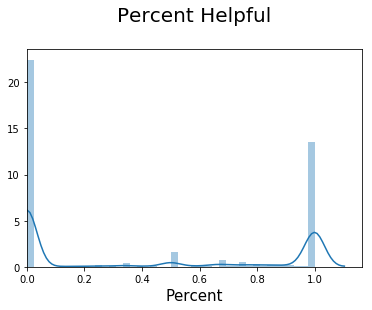

In [36]:
g=sns.distplot(raw_data.ppt_helpful)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Percent Helpful\n',fontsize=20)
g.set_xlabel('Percent',fontsize=15)

In [37]:
probs=list(np.linspace(start=0,stop=1,num=20))

In [38]:
raw_data.ppt_helpful.describe(percentiles=probs)

count    568452.000000
mean          0.407855
std           0.462054
min           0.000000
0%            0.000000
5.3%          0.000000
10.5%         0.000000
15.8%         0.000000
21.1%         0.000000
26.3%         0.000000
31.6%         0.000000
36.8%         0.000000
42.1%         0.000000
47.4%         0.000000
50%           0.000000
52.6%         0.000000
57.9%         0.500000
63.2%         0.727273
68.4%         1.000000
73.7%         1.000000
78.9%         1.000000
84.2%         1.000000
89.5%         1.000000
94.7%         1.000000
100%          1.000000
max           1.000000
Name: ppt_helpful, dtype: float64

In [39]:
probs=list(np.linspace(start=0,stop=1,num=20))
for p in probs:
    ppt=np.sum(raw_data.ppt_helpful<p)/len(raw_data)
    print('Less than {}% Helpful: {}%'.format(round(p*100,2), round(ppt*100,2)))

Less than 0.0% Helpful: 0.0%
Less than 5.26% Helpful: 53.48%
Less than 10.53% Helpful: 53.6%
Less than 15.79% Helpful: 53.81%
Less than 21.05% Helpful: 54.18%
Less than 26.32% Helpful: 54.62%
Less than 31.58% Helpful: 54.78%
Less than 36.84% Helpful: 55.77%
Less than 42.11% Helpful: 56.12%
Less than 47.37% Helpful: 56.31%
Less than 52.63% Helpful: 60.13%
Less than 57.89% Helpful: 60.37%
Less than 63.16% Helpful: 60.88%
Less than 68.42% Helpful: 62.8%
Less than 73.68% Helpful: 63.19%
Less than 78.95% Helpful: 64.51%
Less than 84.21% Helpful: 65.77%
Less than 89.47% Helpful: 66.64%
Less than 94.74% Helpful: 67.42%
Less than 100.0% Helpful: 67.75%


In [40]:
for p in probs:
    ppt=np.sum(raw_data.ppt_helpful>=p)/len(raw_data)
    print('At Least {}% Helpful: {}%'.format(round(p*100,2), round(ppt*100,2)))

At Least 0.0% Helpful: 100.0%
At Least 5.26% Helpful: 46.52%
At Least 10.53% Helpful: 46.4%
At Least 15.79% Helpful: 46.19%
At Least 21.05% Helpful: 45.82%
At Least 26.32% Helpful: 45.38%
At Least 31.58% Helpful: 45.22%
At Least 36.84% Helpful: 44.23%
At Least 42.11% Helpful: 43.88%
At Least 47.37% Helpful: 43.69%
At Least 52.63% Helpful: 39.87%
At Least 57.89% Helpful: 39.63%
At Least 63.16% Helpful: 39.12%
At Least 68.42% Helpful: 37.2%
At Least 73.68% Helpful: 36.81%
At Least 78.95% Helpful: 35.49%
At Least 84.21% Helpful: 34.23%
At Least 89.47% Helpful: 33.36%
At Least 94.74% Helpful: 32.58%
At Least 100.0% Helpful: 32.25%


In [41]:
np.sum((raw_data.ppt_helpful>=0.5) & (raw_data.ppt_helpful<=.8))/len(raw_data)

0.088551012222667883

In [42]:
np.sum((raw_data.ppt_helpful>=0.7) & (raw_data.ppt_helpful<=.8))/len(raw_data)

0.023317711961608017

In [43]:
np.sum((raw_data.ppt_helpful>=0.8) & (raw_data.ppt_helpful<=.9))/len(raw_data)

0.022733669685391204

In [44]:
np.sum((raw_data.ppt_helpful>=0.7) & (raw_data.ppt_helpful<=.9))/len(raw_data)

0.039530162617072331

In [45]:
np.sum((raw_data.ppt_helpful>=0.9) & (raw_data.ppt_helpful<=1))/len(raw_data)

0.33344064230577075

Will probably define helpful reviews as those +90%

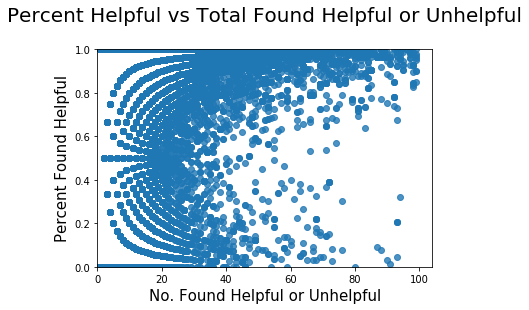

In [46]:
# Plotting the pattern to understand the Helpful vs. Unhelpful reviews
g=sns.regplot(x="HelpfulnessDenominator", y="ppt_helpful", data=raw_data[raw_data.HelpfulnessDenominator<100],
             fit_reg=False)
g.axes.set_ylim(0,1)
g.axes.set_xlim(0,)
g.axes.set_title('Percent Helpful vs Total Found Helpful or Unhelpful\n',fontsize=20)
g.set_xlabel('No. Found Helpful or Unhelpful',fontsize=15)
g.set_ylabel('Percent Found Helpful',fontsize=15)

# My Interpretation


Plotting the helpful vs. total reviews, to understand how they are related to one another, it shows a weird pattern. 

Out of the total reviews, the percent that is found helpful seems to increase with #of total reviews. That is a good sign. 



##### Product Rating

In [47]:
raw_data.Score.isnull().sum()

0

In [48]:
raw_data.Score.describe()

count    568452.000000
mean          4.183198
std           1.310438
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

In [49]:
pd_tab(raw_data,'Score',sort_by='Score')

,Score,count,percent
0,5,363121,0.638789
1,4,80654,0.141884
3,3,42640,0.075011
4,2,29769,0.052369
2,1,52268,0.091948


For this analysis I will assume that the helpfulness prediction will be made without the produce score

##### Time

In [51]:
raw_data.Time.head()

0    1303862400
1    1346976000
2    1219017600
3    1307923200
4    1350777600
Name: Time, dtype: int64

In [52]:
raw_data['date_time']=pd.to_datetime(raw_data['Time'],unit='s')
raw_data['date']=pd.to_datetime(raw_data['date_time'],unit='d')

In [53]:
raw_data.date_time.describe()

count                  568452
unique                   3168
top       2012-10-16 00:00:00
freq                     1143
first     1999-10-08 00:00:00
last      2012-10-26 00:00:00
Name: date_time, dtype: object

In [54]:
raw_data.date.describe()

count                  568452
unique                   3168
top       2012-10-16 00:00:00
freq                     1143
first     1999-10-08 00:00:00
last      2012-10-26 00:00:00
Name: date, dtype: object

Median Percent Helpful

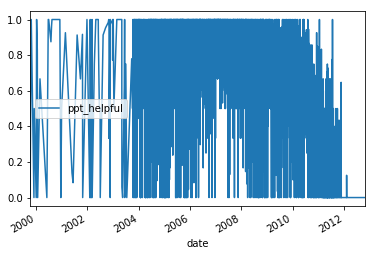

In [55]:
ts=raw_data[['date','ppt_helpful']].copy()
ts['ppt_helpful']=ts.groupby(['date']).ppt_helpful.transform('median')
ts.set_index(['date'],inplace=True)
ts.sort_index(inplace=True)
ts.plot()

Average Helpfulness

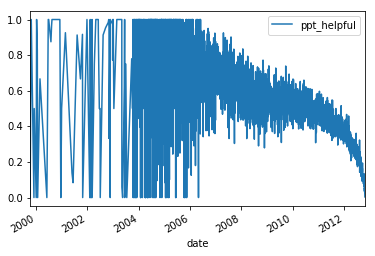

In [56]:
ts=raw_data[['date','ppt_helpful']].copy()
ts['ppt_helpful']=ts.groupby(['date']).ppt_helpful.transform('mean')
ts.set_index(['date'],inplace=True)
ts.sort_index(inplace=True)
ts.plot()

Count Reviews

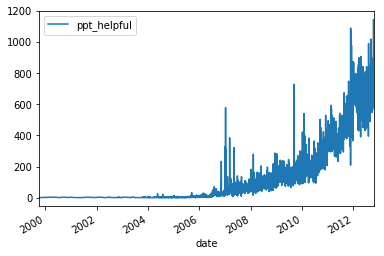

In [57]:
ts=raw_data[['date','ppt_helpful']].copy()
ts['ppt_helpful']=ts.groupby(['date']).ppt_helpful.transform('count')
ts.set_index(['date'],inplace=True)
ts.sort_index(inplace=True)
ts.plot()

In [58]:
ts.head()

,ppt_helpful
date,
1999-10-08,1.0
1999-10-25,1.0
1999-12-02,1.0
1999-12-06,3.0
1999-12-06,3.0


In [59]:
ts.tail()

,ppt_helpful
date,
2012-10-26,564.0
2012-10-26,564.0
2012-10-26,564.0
2012-10-26,564.0
2012-10-26,564.0


In [60]:
len(raw_data[raw_data.date>=pd.to_datetime('2010-01-01')])

447842

In [61]:
len(raw_data[raw_data.date>=pd.to_datetime('2012-01-01')])

198659

In [62]:
raw_data['year']=raw_data.date.dt.year

In [63]:
pd_tab(raw_data,'year',sort_by='year')

,year,count,percent
0,2012,198659,0.349474
1,2011,163299,0.287270
2,2010,85884,0.151084
3,2009,55326,0.097327
4,2008,34161,0.060095
5,2007,22300,0.039229
6,2006,6671,0.011735
7,2005,1335,0.002348
8,2004,561,0.000987
9,2003,132,0.000232


In [64]:
tab=raw_data.groupby(['year']).ppt_helpful.mean().reset_index().sort_values(by='year')

In [65]:
tab

,year,ppt_helpful
0,1999,0.416667
1,2000,0.649432
2,2001,0.600230
3,2002,0.580093
4,2003,0.667129
5,2004,0.693606
6,2005,0.716568
7,2006,0.701132
8,2007,0.649950
9,2008,0.560758


The helpfulness scores are definitely non-stationary across years. I will just use the data from 2012. 

# Building Model Training Data

### Limiting Sample

In [66]:
raw_data_2=raw_data[(raw_data.year==2012)].copy()

### Defining Predictor

In [67]:
raw_data_2['helpful']=(raw_data_2.ppt_helpful>=0.9).astype(float)

In [68]:
pd_tab(raw_data_2,'helpful')

,helpful,count,percent
0,0.0,155170,0.781087
1,1.0,43489,0.218913


In [69]:
del raw_data

### Minor Prelim Text Cleaning

In [70]:
raw_data_2['Text'] = raw_data_2['Text'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

In [71]:
raw_data_2['Text']

1         Product arrived labeled as Jumbo Salted Peanut...
4         Great taffy at a great price.  There was a wid...
5         I got a wild hair for taffy and ordered this f...
6         This saltwater taffy had great flavors and was...
7         This taffy is so good.  It is very soft and ch...
9         This is a very healthy dog food. Good for thei...
12        My cats have been happily eating Felidae Plati...
16        I love eating them and they are good for watch...
17        I am very satisfied with my Twizzler purchase....
26        The candy is just red , No flavor . Just  plan...
27        I was so glad Amazon carried these batteries. ...
28        I got this for my Mum who is not diabetic but ...
38        I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
49        This is the same stuff you can buy at the big ...
52        This wasn't in stock the last time I looked. I...
55        We roast these in a large cast iron pan on the...
57        It is chocolate, what can I sa

### New Features

In [72]:
nlp=spacy.load('en')

In [99]:
raw_data_2['doc_id']=(np.linspace(start=1,stop=len(raw_data_2),num=len(raw_data_2))-1)
raw_data_2['doc_id'].head()

1    0.0
4    1.0
5    2.0
6    3.0
7    4.0
Name: doc_id, dtype: float64

In [100]:
#https://spacy.io/docs/usage/processing-text
parse_doc_list=[nlp(doc) for i, doc in enumerate(raw_data_2.Text.astype(str))]
parse_doc_list_id=[i for i, doc in enumerate(raw_data_2.Text.astype(str))]

In [125]:
for doc in nlp.pipe(raw_data_2.Text.head(1).astype(str)):
    print(doc)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


In [127]:
for doc in raw_data_2.Text.head(1).astype(str):
    print(type(nlp(doc)))

<class 'spacy.tokens.doc.Doc'>


In [129]:
parse_doc_list=[]
parse_doc_list_id=[]
i=0
for doc in nlp.pipe(raw_data_2.Text.astype(str),batch_size=10000,n_threads=20):
    parse_doc_list.append(doc)
    parse_doc_list_id.append(i)
    i=i+1

In [168]:
raw_data_2['parsed_text'] = parse_doc_list

In [169]:
type((parse_doc_list[0]))

spacy.tokens.doc.Doc

##### Document Vector

In [170]:
parse_doc_list[0]

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

In [171]:
doc_vecs = np.row_stack([doc.vector for doc in parse_doc_list])
doc_vecs = np.column_stack((doc_vecs,parse_doc_list_id))

In [172]:
doc_vecs.shape

(198659, 301)

In [173]:
len(raw_data_2)

198659

In [174]:
doc_vecs=pd.DataFrame(doc_vecs)

In [175]:
cols=['vec'+str(s) for s in doc_vecs.columns]
cols[-1]='doc_id'

In [176]:
doc_vecs.columns=cols

In [177]:
doc_vecs.to_pickle('./clean_data/doc_vecs.pkl')

In [178]:
raw_data_2=pd.merge(raw_data_2,doc_vecs,how='left',on=['doc_id'])

##### Word and Sentence Count

In [179]:
def sent_count(X):
    return len([x for x in X.sents])

def word_count(X):
    return len(X)

In [180]:
raw_data_2['num_sents'] = raw_data_2['parsed_text'].apply(sent_count)

In [181]:
raw_data_2['num_words'] = raw_data_2['parsed_text'].apply(word_count)

##### Readability

In [ ]:
#Python package to calculate statistics from text, which helps to decide readability, complexity and grade level of a particular corpus.


In [182]:
raw_data_2['readability'] = raw_data_2['Text'].apply(textstat.automated_readability_index)

##### Sentiment

In [183]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [184]:
sent_analyzer = SentimentIntensityAnalyzer()

In [185]:
raw_data_2['sentiment_dict'] = raw_data_2['Text'].apply(sent_analyzer.polarity_scores)

In [186]:
raw_data_2['neg_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['neg'])

In [187]:
raw_data_2['pos_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['pos'])

In [188]:
raw_data_2['neu_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['neu'])

In [189]:
raw_data_2['comp_senti'] = raw_data_2['sentiment_dict'].apply(lambda x: x['compound'])

##### Word Count Type Features

In [190]:
def return_lemma_text(text):
    '''
    Return space separated lemmas, excluding spaces, urls, #s, emails, stop words, and proper nouns
    '''
    return ' '.join([t.lemma_.lower() for t in text if (t.is_punct==False) &
                                                (t.is_space==False) &
                                                (t.like_url==False) &
                                                (t.like_num==False) &
                                                (t.like_email==False) &
                                                (t.is_stop==False) &
                                                (t.pos_!='PROPN')])

In [191]:
raw_data_2['text_lemma'] = raw_data_2['parsed_text'].apply(return_lemma_text)

In [192]:
raw_data_2['Text'].head()

0    Product arrived labeled as Jumbo Salted Peanut...
1    Great taffy at a great price.  There was a wid...
2    I got a wild hair for taffy and ordered this f...
3    This saltwater taffy had great flavors and was...
4    This taffy is so good.  It is very soft and ch...
Name: Text, dtype: object

In [193]:
raw_data_2['text_lemma'].head()

0    product arrive label peanut actually small siz...
1    great taffy great price wide assortment yummy ...
2    get wild hair taffy order pound bag taffy enjo...
3    saltwater taffy great flavor soft chewy candy ...
4    taffy good soft chewy flavor amazing definitel...
Name: text_lemma, dtype: object

In [194]:
del raw_data_2['parsed_text']

In [200]:
len(raw_data_2.columns)

627

In [202]:
raw_data_2.to_pickle('./clean_data/raw_data_post_parse.pkl')

### The Obligatory NLP Word Clouds

All Reviews

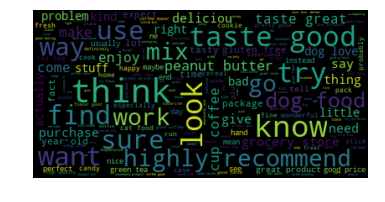

In [203]:
text=' '.join(raw_data_2.text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/all_reviews_word_cloud.png', bbox_inches='tight')
plt.show()

Helpful Reviews

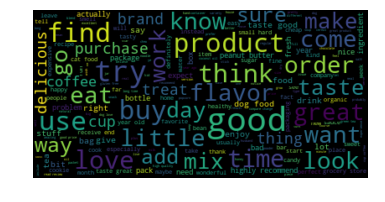

In [204]:
text=' '.join(raw_data_2[raw_data_2.helpful==1].text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/helpful_reviews_word_cloud.png', bbox_inches='tight')
plt.show()

Unhelpful Reviews

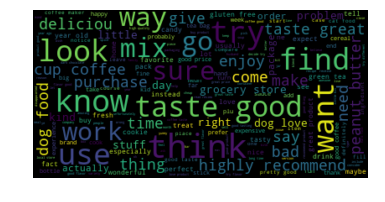

In [205]:
text=' '.join(raw_data_2[raw_data_2.helpful==0].text_lemma)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./plots/unhelpful_reviews_word_cloud.png', bbox_inches='tight')
plt.show()